In [74]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [75]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [3]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


# 2 Grid Search

Fill in the function `grid_search()` below:

Let us play with the grid search demo now!

Grid Search: loss*=20.759339381144198, w0*=75.86206896551724, w1*=15.517241379310349, execution time=0.325 seconds


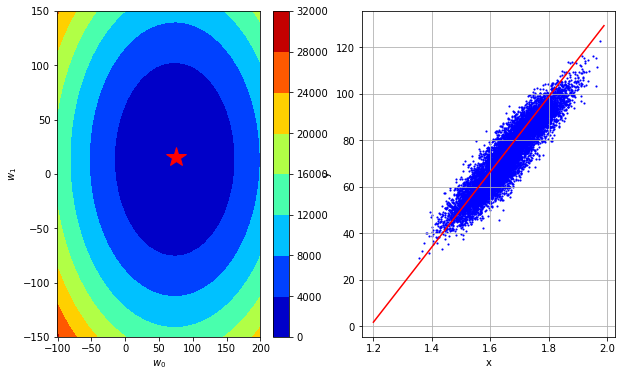

In [4]:
from grid_search import generate_w, get_best_parameters, grid_search
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=30)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [9]:
gd_m = __import__('gradient descent')

In [11]:
print(gd_m.compute_gradient(y, tx, [1,2]))
print(gd_m.compute_gradient(y, tx, [100,20]))
print(gd_m.compute_gradient(y, tx, [50, 10]))

[-72.293922   -11.47971243]
[ 26.706078     6.52028757]
[-23.293922    -3.47971243]


Test your gradient descent function through gradient descent demo shown below:

In [15]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.1

# Initialization
w_initial = np.array([-1000, 1000], dtype = np.float64)

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gd_m.gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=1062606.4462798769, w0=-892.6706077997894, w1=901.3479712434989
Gradient Descent(1/49): loss=860714.1448053952, w0=-796.0741548196003, w1=812.5611453626474
Gradient Descent(2/49): loss=697181.380611065, w0=-709.1373471374295, w1=732.6530020698815
Gradient Descent(3/49): loss=564719.8416136575, w0=-630.894220223476, w1=660.7356731063919
Gradient Descent(4/49): loss=457425.9950257574, w0=-560.475406000918, w1=596.0100770392514
Gradient Descent(5/49): loss=370517.97928955854, w0=-497.09847320061556, w1=537.7570405788252
Gradient Descent(6/49): loss=300122.48654323746, w0=-440.05923368034354, w1=485.3293077644413
Gradient Descent(7/49): loss=243102.1374187173, w0=-388.72391811209854, w1=438.14434823149594
Gradient Descent(8/49): loss=196915.65462785598, w0=-342.522134100678, w1=395.67788465184515
Gradient Descent(9/49): loss=159504.60356725828, w0=-300.94052849039963, w1=357.4580674301594
Gradient Descent(10/49): loss=129201.65220817423, w0=-263.517083441149, w

<function __main__.plot_figure>

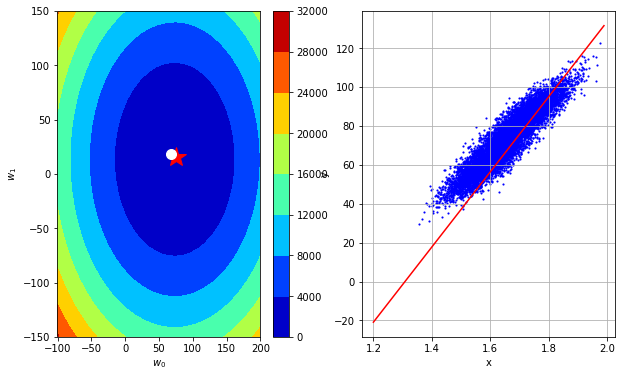

In [16]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [23]:
from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 10

# Initialization
w_initial = np.array([0, 0], dtype = np.float64)

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/49): loss=2792.2367127591674, w0=56.438146907098506, w1=47.635170327664014
Stochastic Gradient Descent(1/49): loss=740.7421168247004, w0=72.93052843863568, w1=29.05124405222238
Stochastic Gradient Descent(2/49): loss=136.68821376306363, w0=76.3691048791138, w1=10.19346686673001
Stochastic Gradient Descent(3/49): loss=25.513967699803995, w0=75.91892702151627, w1=11.246515810197021
Stochastic Gradient Descent(4/49): loss=21.32479712728734, w0=73.75709220386081, w1=12.066966587878294
Stochastic Gradient Descent(5/49): loss=16.491076600990915, w0=72.85714678989915, w1=11.970237918850044
Stochastic Gradient Descent(6/49): loss=16.620530819264758, w0=71.6667023256091, w1=12.950593929805828
Stochastic Gradient Descent(7/49): loss=16.84979300288109, w0=71.2248797234202, w1=12.883117255885287
Stochastic Gradient Descent(8/49): loss=17.70431874818731, w0=72.84013836536393, w1=14.801906663217292
Stochastic Gradient Descent(9/49): loss=16.3629464518965, w0=76.43702739

<function __main__.plot_figure>

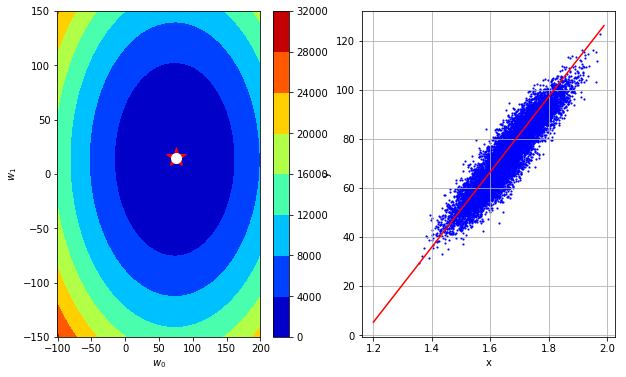

In [24]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

In [114]:
height, weight, gender = load_data(sub_sample=True, add_outlier=True)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [115]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.5

# Initialization
w_initial = np.array([0, 0], dtype = np.float64)

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gd_m.gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=2869.8351145358524, w0=37.03390292746317, w1=5.517447432994592
Gradient Descent(1/49): loss=766.906826210916, w0=55.55085439119476, w1=8.27617114949187
Gradient Descent(2/49): loss=241.1747541296816, w0=64.80933012306056, w1=9.655533007740496
Gradient Descent(3/49): loss=109.74173610937292, w0=69.43856798899347, w1=10.345213936864806
Gradient Descent(4/49): loss=76.88348160429575, w0=71.75318692195992, w1=10.69005440142696
Gradient Descent(5/49): loss=68.66891797802646, w0=72.91049638844315, w1=10.86247463370803
Gradient Descent(6/49): loss=66.61527707145913, w0=73.48915112168476, w1=10.948684749848566
Gradient Descent(7/49): loss=66.10186684481732, w0=73.77847848830557, w1=10.991789807918835
Gradient Descent(8/49): loss=65.97351428815686, w0=73.92314217161596, w1=11.013342336953967
Gradient Descent(9/49): loss=65.94142614899174, w0=73.99547401327116, w1=11.024118601471535
Gradient Descent(10/49): loss=65.93340411420047, w0=74.03163993409876, w1=11.02950673

<function __main__.plot_figure>

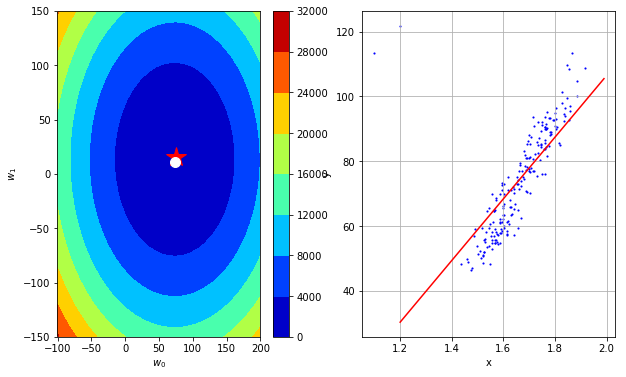

In [116]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)

In [123]:
from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 200
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0], dtype = np.float64)

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma, mae = True)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Stochastic Gradient Descent(0/199): loss=74.06780585492638, w0=0.7, w1=0.5241805514517182
Stochastic Gradient Descent(1/199): loss=73.36780585492637, w0=1.4, w1=0.7229414172702426
Stochastic Gradient Descent(2/199): loss=72.66780585492637, w0=2.0999999999999996, w1=0.19598438150139474
Stochastic Gradient Descent(3/199): loss=71.96780585492638, w0=2.8, w1=-0.6038463525613148
Stochastic Gradient Descent(4/199): loss=71.26780585492638, w0=3.5, w1=0.012540596275934845
Stochastic Gradient Descent(5/199): loss=70.56780585492639, w0=4.2, w1=-0.3869171761106439
Stochastic Gradient Descent(6/199): loss=69.86780585492637, w0=4.9, w1=-1.0675163537667265
Stochastic Gradient Descent(7/199): loss=69.16780585492639, w0=5.6000000000000005, w1=-1.2847733579464766
Stochastic Gradient Descent(8/199): loss=68.46780585492638, w0=6.300000000000001, w1=-0.7438163059753344
Stochastic Gradient Descent(9/199): loss=67.76780585492638, w0=7.000000000000001, w1=-0.7285086392631985
Stochastic Gradient Descent(10/19

<function __main__.plot_figure>

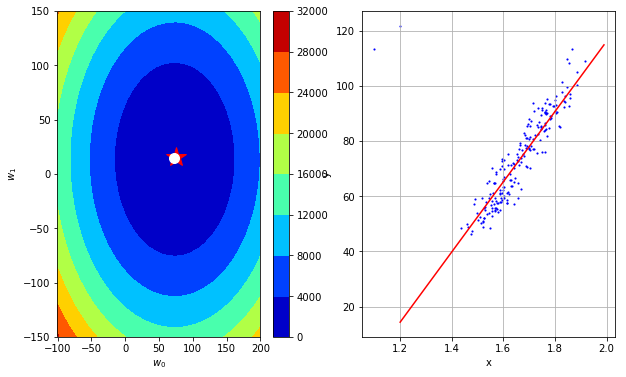

In [124]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))